In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 


In [2]:
import joblib
import pickle

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
import tensorflow as tf 
from keras.layers import Dense, Conv2D, Flatten, Input ,MaxPooling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
(X_train , y_train) , (X_test, y_test) = mnist.load_data()

In [7]:
print(type(X_train))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


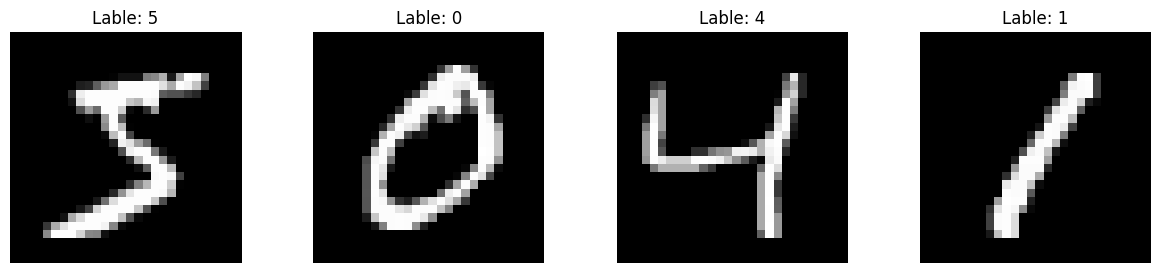

In [8]:
fig, ax = plt.subplots(1,4 , figsize=(15,3) )

for i in range(len(ax)):
    ax[i].imshow(X_train[i], cmap='gray')
    ax[i].set_title(f"Lable: {y_train[i]}")
    ax[i].axis("off")

plt.show()

In [9]:
print(X_train[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

In [10]:
print(len(y_train))
print(len(X_train))

60000
60000


In [11]:
num_classes = len(np.unique(y_train))
print(num_classes)

10


In [12]:
y_train = to_categorical(y_train, num_classes= num_classes)

In [13]:
y_test = to_categorical(y_test , num_classes = num_classes)

In [14]:
print(len(y_train))

60000


In [15]:
X_train , X_val , y_train , y_val = train_test_split(X_train , y_train , test_size=0.1 , random_state=20)

In [16]:
print(len(X_train))
print(len(X_val))
print(len(y_train))

54000
6000
54000


In [17]:
print(X_train.shape)
print(y_train.shape)

(54000, 28, 28)
(54000, 10)


In [18]:
print(X_train[1].shape)

(28, 28)


In [19]:
model = Sequential([
    Conv2D(32 , (3,3) , activation="relu" ,  input_shape= (28,28,1)),
    MaxPooling2D(),
    Conv2D(64 , (3,3) , activation="relu"),
    MaxPooling2D(),
    Conv2D(128, (3,3) , activation="relu"),
    MaxPooling2D(),

    Flatten(),
    Dense(512 , activation="relu"),
    Dense(10,activation="softmax")
])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 128)        0

In [21]:
model.compile(loss="categorical_crossentropy" , optimizer="adam" , weighted_metrics=["accuracy"])


In [22]:
model.fit(
    X_train, 
    y_train, 
    batch_size=32,
    epochs = 10,
    validation_data = (X_val,y_val)
    
)

Epoch 1/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.2661 - accuracy: 0.9345 - val_loss: 0.0928 - val_accuracy: 0.9738
Epoch 2/10
1688/1688 [==============================] - 8s 4ms/step - loss: 0.0859 - accuracy: 0.9739 - val_loss: 0.0759 - val_accuracy: 0.9747
Epoch 3/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0688 - accuracy: 0.9789 - val_loss: 0.0734 - val_accuracy: 0.9805
Epoch 4/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0572 - accuracy: 0.9825 - val_loss: 0.0663 - val_accuracy: 0.9788
Epoch 5/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0528 - accuracy: 0.9843 - val_loss: 0.1164 - val_accuracy: 0.9707
Epoch 6/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0457 - accuracy: 0.9864 - val_loss: 0.0697 - val_accuracy: 0.9817
Epoch 7/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0424 - accuracy: 0.9873 - val_loss: 0.0777 - val_accuracy:

In [23]:
val_loss , val_acc = model.evaluate(X_test ,y_test )

print(f"Validation loss = {val_loss}")
print(f"Validation accuracy = {val_acc}")

313/313 [==============================] - 3s 9ms/step - loss: 0.0756 - accuracy: 0.9826
Validation loss = 0.07561547309160233
Validation accuracy = 0.9825999736785889


1/1 [==============================] - 0s 60ms/step


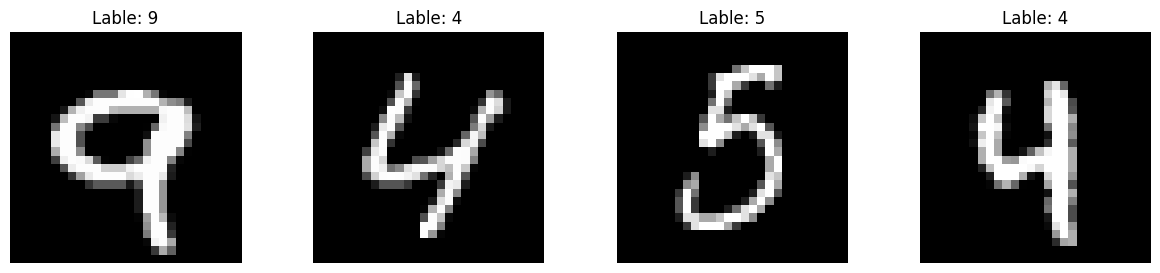

In [27]:
fig, ax = plt.subplots(1,4 , figsize=(15,3) )
y_pred =np.argmax(model.predict(X_train[:len(ax)]) , axis=1)

for i in range(len(ax)):
    ax[i].imshow(X_train[i], cmap='gray')
    ax[i].set_title(f"Lable: {y_pred[i]}")
    ax[i].axis("off")

plt.show()

In [74]:
# model.save("digit_recog_full.h5")
# model.save_weights("digit_recog_weights.h5")

In [ ]:
# joblib.dump(model, 'trained_model.joblib')

In [ ]:
# m = joblib.load('trained_model.joblib')

In [ ]:
# with open('serialized_data.pkl','wb') as file:
#     pickle.dump(model , file)


In [ ]:
# with open('serialized_data.pkl' , 'rb') as file:
#     m = pickle.load(file)